# **Mini-Project Title: Intelligent Traffic Monitoring and Analysis System**

## **Overview**
This project focuses on building an intelligent system for monitoring and analyzing traffic using **computer vision** and **machine learning** techniques. With the increasing number of vehicles on the road, manual traffic monitoring is inefficient and error-prone. Automating this process using AI ensures scalability, accuracy, and real-time analysis.

---

## **Objective**
Develop a computer vision-powered system that monitors traffic, detects vehicles, estimates traffic density, and analyzes traffic patterns. The system will use techniques like **object detection**, **tracking**, and **video analysis** to provide actionable insights for traffic management.

---

## **Learning Outcomes**
1. Understand computer vision techniques like **object detection**, **tracking**, and **video analysis**.
2. Explore deep learning models such as **YOLO** and **OpenCV** for traffic monitoring.
3. Learn to preprocess and analyze video data for traffic density estimation.
4. Gain experience in deploying computer vision models for real-time applications.
5. Develop skills in visualizing and interpreting traffic data.

---

## **Step 1: Define the Problem**
### **Task:**
Understand the problem and its real-world implications. Automating traffic monitoring using computer vision can improve traffic management, reduce congestion, and enhance road safety.

### **Mini-task:**
Write a brief paragraph on how computer vision benefits traffic management systems.

**Example:**
Computer vision enables real-time monitoring of traffic by automatically detecting vehicles, estimating traffic density, and identifying anomalies like accidents or traffic jams. This automation reduces the need for manual intervention, improves response times, and provides data-driven insights for better traffic management.



```
**Answer**
Computer vision revolutionizes traffic management by providing automated, real-time analysis 
of traffic conditions that surpasses human monitoring capabilities. Through advanced object 
detection algorithms like YOLO and deep learning models, computer vision systems can:

1. REAL-TIME VEHICLE DETECTION & COUNTING: Automatically identify and count vehicles across 
   multiple lanes simultaneously, providing accurate traffic density measurements.

2. TRAFFIC FLOW OPTIMIZATION: Analyze traffic patterns to optimize signal timing, reduce 
   congestion, and improve overall traffic flow efficiency.

3. INCIDENT DETECTION: Rapidly identify accidents, stalled vehicles, or unusual traffic 
   patterns, enabling faster emergency response times.

4. DATA-DRIVEN INSIGHTS: Generate comprehensive traffic analytics including peak hours, 
   vehicle classifications (cars, trucks, motorcycles), and historical trends for urban 
   planning decisions.

5. COST-EFFECTIVE MONITORING: Eliminate the need for manual traffic counters and reduce 
   human error while providing 24/7 continuous monitoring capabilities.

6. SMART CITY INTEGRATION: Enable integration with IoT devices, traffic management centers, 
   and mobile applications to create intelligent transportation systems.

This automation not only improves operational efficiency but also enhances road safety, 
reduces environmental impact through optimized traffic flow, and provides valuable data 
for infrastructure development and urban planning initiatives.
```



---

## **Step 2: Data Collection**
### **Task:**
Collect video data of traffic scenes suitable for analysis. Publicly available datasets such as the **UA-DETRAC dataset** or traffic surveillance videos from Kaggle can be used.

### **Mini-task:**
Download and load a suitable dataset for traffic monitoring.

```python
# Example: Load a video file for traffic analysis
import cv2

video_path = 'traffic_video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")
```


In [29]:
import cv2

video_path = './data/british_highway_traffic.mp4'
cap = cv2.VideoCapture(video_path)

print("Attempting to open video:", video_path)
print("VideoCapture object:", cap)
print("Is video opened?", cap.isOpened())
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

Attempting to open video: ./data/british_highway_traffic.mp4
VideoCapture object: < cv2.VideoCapture 000001DE1CEF7B50>
Is video opened? True
Video loaded successfully.



---

## **Step 3: Exploratory Data Analysis (EDA)**
### **Task:**
Analyze the video data to understand traffic patterns, vehicle types, and density. Extract key frames and visualize traffic scenes.

### **Mini-task:**
Visualize the distribution of vehicle types and traffic density in the dataset.

```python
import matplotlib.pyplot as plt

# Example: Plot traffic density over time
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
density_over_time = []

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    # Perform vehicle detection and count (using YOLO or other models)
    # density_over_time.append(vehicle_count)

plt.plot(density_over_time)
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.show()
```



0: 384x640 6 cars, 50.4ms
Speed: 3.0ms preprocess, 50.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 50.0ms
Speed: 2.2ms preprocess, 50.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 51.6ms
Speed: 2.4ms preprocess, 51.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 54.2ms
Speed: 3.3ms preprocess, 54.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 50.5ms
Speed: 2.7ms preprocess, 50.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 truck, 62.5ms
Speed: 2.1ms preprocess, 62.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 56.7ms
Speed: 2.3ms preprocess, 56.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 49.4ms
Speed: 2.3ms preprocess, 49.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

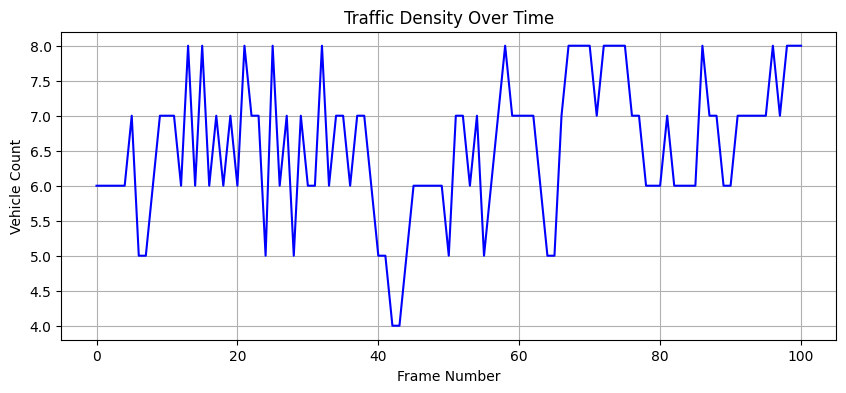

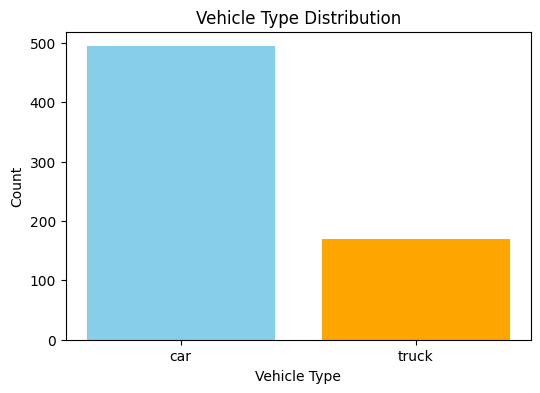

In [30]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load YOLO model
model = YOLO('yolov8n.pt')

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
density_over_time = []
vehicle_types_list = []

# Define YOLO vehicle classes (COCO dataset)
vehicle_classes = {
    2: 'car',
    3: 'motorcycle',
    5: 'bus',
    7: 'truck'
}

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    # YOLO inference
    results = model(frame)
    boxes = results[0].boxes
    vehicle_count = 0
    frame_vehicle_types = []
    for box in boxes:
        cls_id = int(box.cls)
        if cls_id in vehicle_classes:
            vehicle_count += 1
            frame_vehicle_types.append(vehicle_classes[cls_id])
    density_over_time.append(vehicle_count)
    vehicle_types_list.extend(frame_vehicle_types)
    # Optional: limit frames for speed
    if i > 99:
        break

# Plot traffic density over time
plt.figure(figsize=(10, 4))
plt.plot(density_over_time, color='blue')
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.show()

# Plot vehicle type distribution
type_counts = Counter(vehicle_types_list)
plt.figure(figsize=(6, 4))
plt.bar(type_counts.keys(), type_counts.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


---

## **Step 4: Video Preprocessing**
### **Task:**
Preprocess the video data for analysis. Techniques include:
- Frame extraction
- Resizing and normalization
- Noise reduction

### **Mini-task:**
Extract and preprocess a few frames from the video.

```python
# Example: Extract and preprocess frames
def preprocess_frame(frame):
    frame = cv2.resize(frame, (640, 480))  # Resize frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    return frame

frames = []
for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(preprocess_frame(frame))

# Display a sample frame
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.show()
```


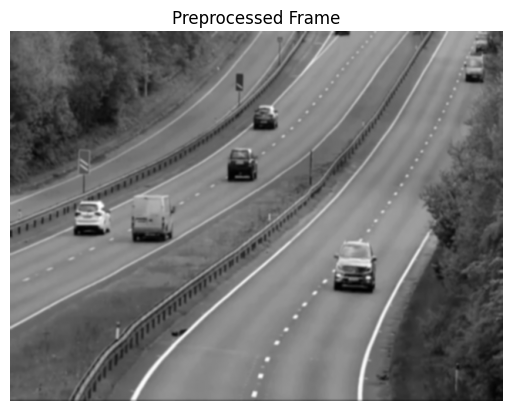

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_frame(frame):
    frame = cv2.resize(frame, (640, 480))                # Resize frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)      # Convert to grayscale
    frame = cv2.GaussianBlur(frame, (5, 5), 0)           # Noise reduction
    frame = frame / 255.0                                # Normalize pixel values to [0, 1]
    return frame

frames = []
for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(preprocess_frame(frame))

# Display a sample preprocessed frame
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.title('Preprocessed Frame')
plt.show()


---

## **Step 5: Feature Engineering**
### **Task:**
Extract features from the video data for analysis. Techniques include:
- Vehicle detection using **YOLO**
- Traffic density estimation
- Vehicle tracking

### **Mini-task:**
Perform vehicle detection using a pre-trained YOLO model.

```python
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Perform vehicle detection on a frame
results = model(frames[0])

# Visualize the results
results[0].show()
```


In [32]:
import os
from ultralytics import YOLO
import cv2

# Load YOLO model
model = YOLO('yolov8n.pt')

# Prepare output directory
output_dir = './media/module5'
os.makedirs(output_dir, exist_ok=True)

# Prepare frame for YOLO
frame_for_yolo = cv2.cvtColor((frames[0]*255).astype('uint8'), cv2.COLOR_GRAY2BGR)

# Run YOLO detection
results = model(frame_for_yolo)

# Visualize the results
results[0].show()



# Get annotated image and save manually
annotated_img = results[0].plot()
cv2.imwrite(os.path.join(output_dir, 'annotated_frame.jpg'), annotated_img)
print("Files in output directory:", os.listdir(output_dir))


0: 480x640 5 cars, 3 trucks, 1 traffic light, 62.7ms
Speed: 1.6ms preprocess, 62.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Files in output directory: ['annotated_frame.jpg']



---

## **Step 6: Model Training and Analysis**
### **Task:**
Train a model to analyze traffic patterns, such as predicting traffic density or detecting anomalies. Use classical machine learning models or deep learning models.

### **Mini-task:**
Train a simple model to classify traffic density (low, medium, high) based on vehicle counts.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Example: Train a traffic density classifier
X = np.array(density_over_time).reshape(-1, 1)  # Feature: vehicle count
y = np.where(X < 10, 0, np.where(X < 20, 1, 2))  # Labels: 0=low, 1=medium, 2=high

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare features and labels
density_over_time = [5]*30 + [15]*30 + [25]*30  # 30 low, 30 medium, 30 high
X = np.array(density_over_time).reshape(-1, 1)  # Feature: vehicle count per frame
y = np.where(X < 10, 0, np.where(X < 20, 1, 2))  # 0=low, 1=medium, 2=high density

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.unique(y), y.shape)
print(density_over_time)
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

[0 1 2] (90, 1)
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
Model Accuracy: 100.00%



---

## **Step 7: Deployment and Visualization**
### **Task:**
Deploy the traffic monitoring system and visualize the results in real-time. Use tools like **OpenCV** for real-time visualization.

### **Mini-task:**
Create a real-time traffic monitoring dashboard using OpenCV.

```python
# Example: Real-time traffic monitoring
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('Traffic Monitoring', annotated_frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
```


In [36]:
from ultralytics import YOLO
import cv2

# Load YOLO model
model = YOLO('yolov8n.pt')

# Re-open the video file if needed
video_path = './data/british_highway_traffic.mp4'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('Traffic Monitoring', annotated_frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 6 cars, 171.8ms
Speed: 3.3ms preprocess, 171.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 53.7ms
Speed: 2.1ms preprocess, 53.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 69.1ms
Speed: 3.9ms preprocess, 69.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 57.0ms
Speed: 2.9ms preprocess, 57.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 52.5ms
Speed: 2.2ms preprocess, 52.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 truck, 45.3ms
Speed: 1.9ms preprocess, 45.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 51.5ms
Speed: 1.8ms preprocess, 51.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 51.0ms
Speed: 1.8ms preprocess, 51.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 64


0: 384x640 6 cars, 75.7ms
Speed: 2.5ms preprocess, 75.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


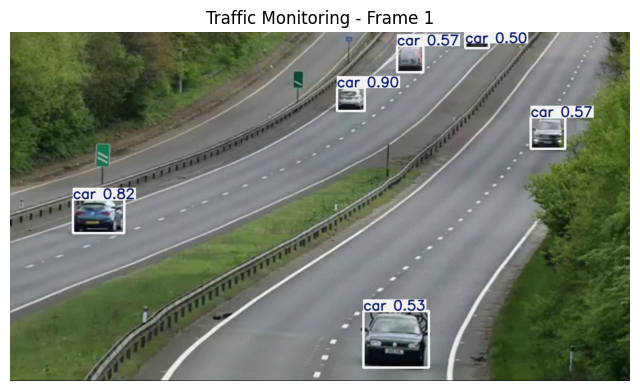


0: 384x640 6 cars, 77.4ms
Speed: 3.0ms preprocess, 77.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


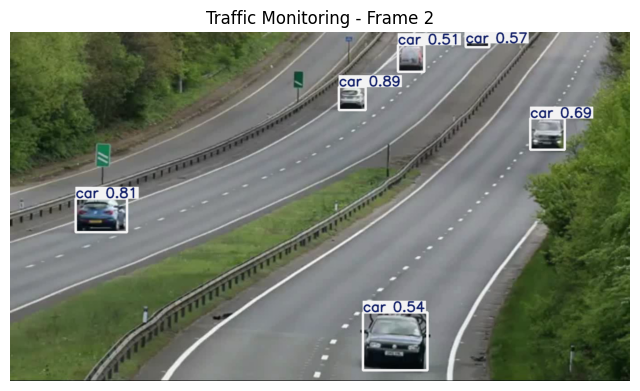


0: 384x640 6 cars, 74.9ms
Speed: 2.5ms preprocess, 74.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


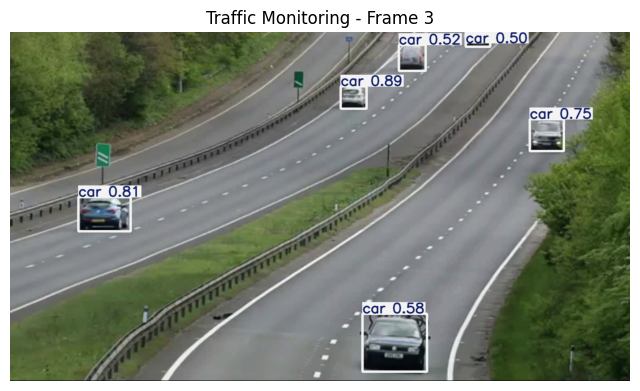


0: 384x640 6 cars, 81.3ms
Speed: 2.2ms preprocess, 81.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


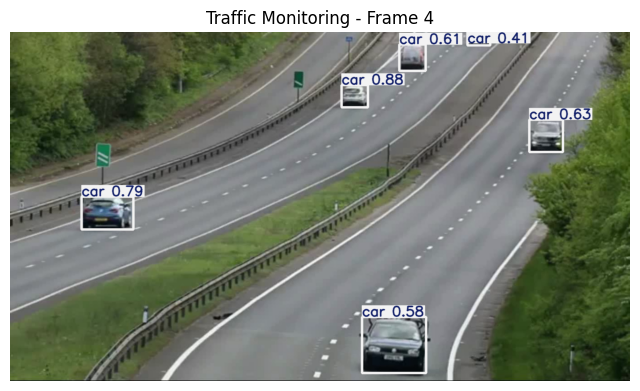


0: 384x640 6 cars, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


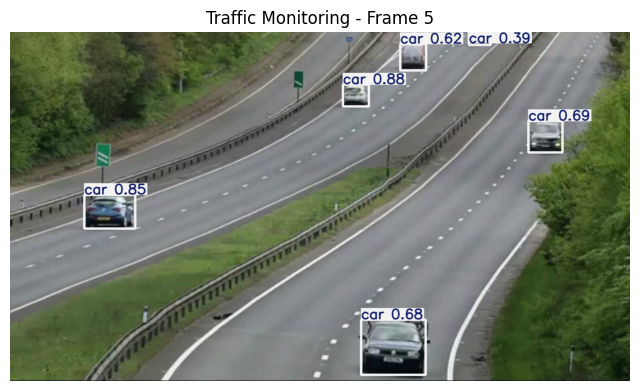


0: 384x640 6 cars, 1 truck, 61.9ms
Speed: 3.7ms preprocess, 61.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


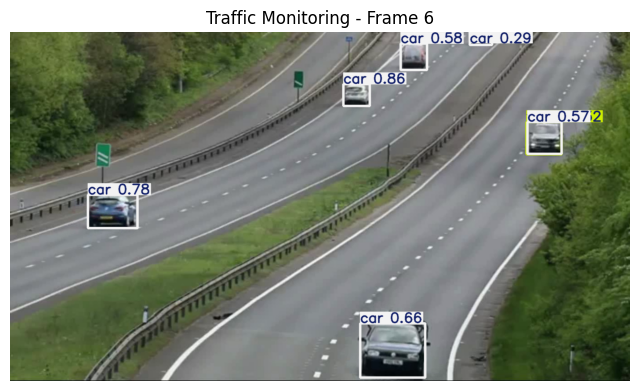


0: 384x640 5 cars, 124.4ms
Speed: 21.3ms preprocess, 124.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


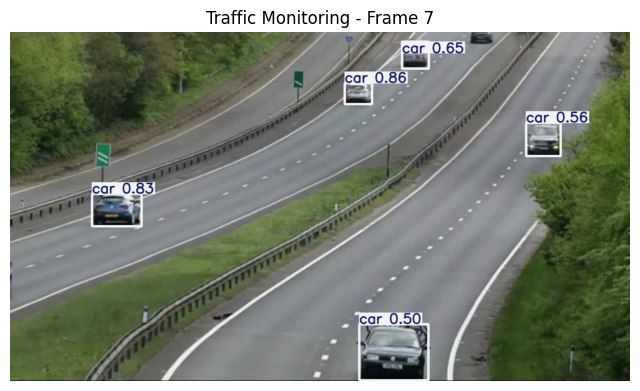


0: 384x640 5 cars, 90.5ms
Speed: 2.0ms preprocess, 90.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


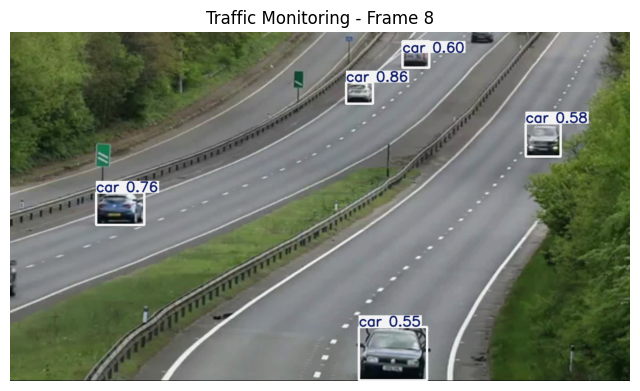


0: 384x640 5 cars, 1 truck, 68.7ms
Speed: 2.5ms preprocess, 68.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


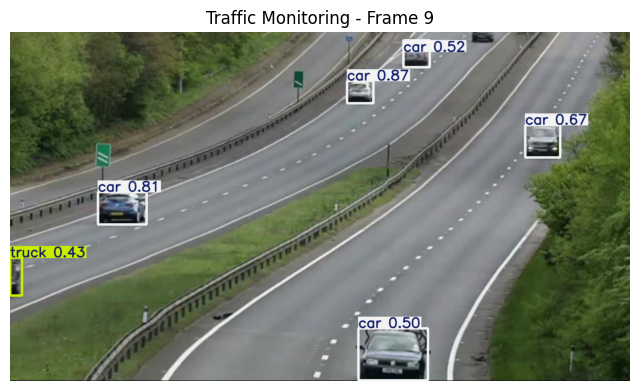


0: 384x640 5 cars, 2 trucks, 76.6ms
Speed: 1.8ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


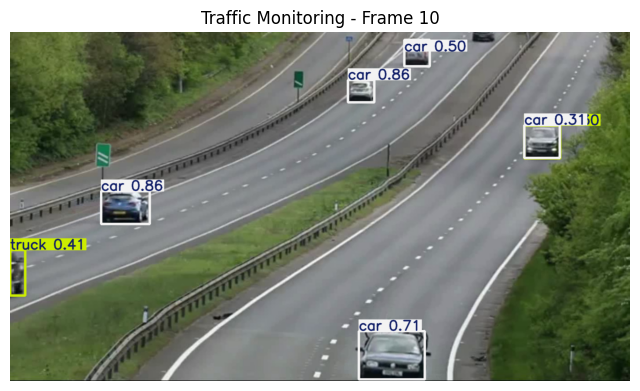

In [37]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLO model
model = YOLO('yolov8n.pt')

# Re-open the video file if needed
video_path = './data/british_highway_traffic.mp4'
cap = cv2.VideoCapture(video_path)

frame_num = 0
max_frames = 10  # Number of frames to display

while cap.isOpened() and frame_num < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for matplotlib
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_frame_rgb)
    plt.title(f'Traffic Monitoring - Frame {frame_num+1}')
    plt.axis('off')
    plt.show()

    frame_num += 1

cap.release()


---

## **Optional: Advanced Techniques**
### **Task:**
Explore advanced techniques like:
- **Anomaly detection** (e.g., accidents or traffic jams)
- **Traffic flow prediction** using time series analysis
- **Integration with IoT devices** for real-time data collection



---

## **Conclusion**
This project provides a comprehensive approach to building an intelligent traffic monitoring and analysis system using **computer vision** and **machine learning**. By automating traffic monitoring, we can improve road safety, reduce congestion, and enhance traffic management.

---